In [1]:
import librosa
import librosa.display

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import load_img
import pickle

import os
import pandas as pd

Following the steps done in the EDA Notebook, here:
- Different spectogram settings are explored
- A loop is created to extract audio files from local folder, transform them to Spectogram, and save them locally
- Duration of each audio is extracted, to check if it is distributed similarly between categories

### CREMA-D Sample - import and display wave, and Spectogram

c:\Users\maisa\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


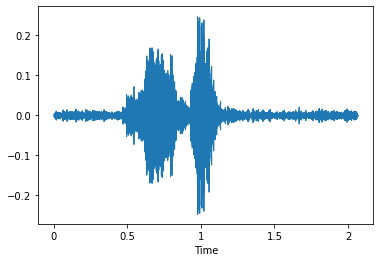

In [2]:
# Angry
sample_C1 , sr_C1 = librosa.load('../data/audio/1001_IEO_ANG_LO.wav', sr=16000)
librosa.display.waveshow(sample_C1 , sr_C1)

In [3]:
sample_C1.shape

(33100,)

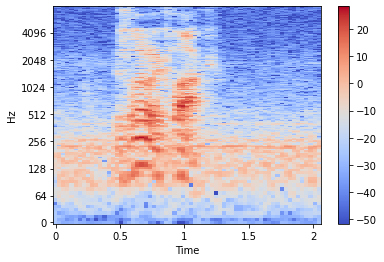

In [4]:
# Spectrogram of frequency
X_C1 = librosa.stft(sample_C1)
Xdb_C1 = librosa.amplitude_to_db(abs(X_C1))
plt.figure()
librosa.display.specshow(Xdb_C1, sr=sr_C1, x_axis='time', y_axis='log')
plt.colorbar()

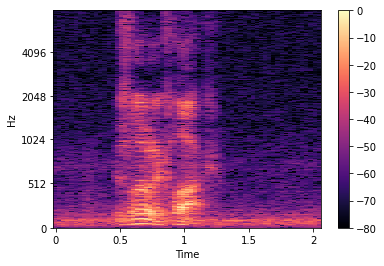

In [5]:
# Spectrogram of frequency
X_C1 = librosa.stft(sample_C1)
Xdb_C1 = librosa.amplitude_to_db(np.abs(X_C1), ref=np.max)
#plt.figure()
librosa.display.specshow(Xdb_C1, sr=sr_C1, x_axis='time', y_axis='mel')
plt.colorbar()

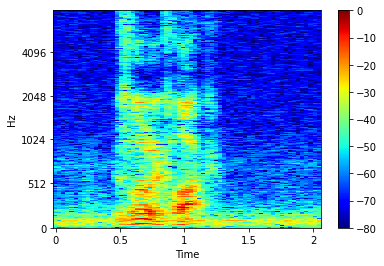

In [8]:
# Spectrogram of frequency - cmap='jet' (in accordance with litirature)
X_C1 = librosa.stft(sample_C1)
Xdb_C1 = librosa.amplitude_to_db(np.abs(X_C1), ref=np.max)
#plt.figure()
librosa.display.specshow(Xdb_C1, sr=sr_C1, x_axis='time', y_axis='mel', cmap='jet')
plt.colorbar()


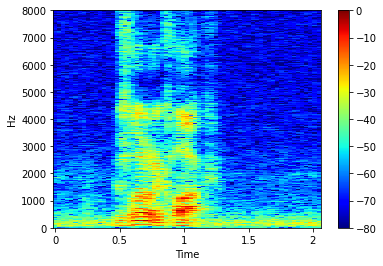

In [9]:
# Spectrogram of frequency - y_axis='hz'
X_C1 = librosa.stft(sample_C1)
Xdb_C1 = librosa.amplitude_to_db(np.abs(X_C1), ref=np.max)
#plt.figure()
librosa.display.specshow(Xdb_C1, sr=sr_C1, x_axis='time', y_axis='hz', cmap='jet')
plt.colorbar()


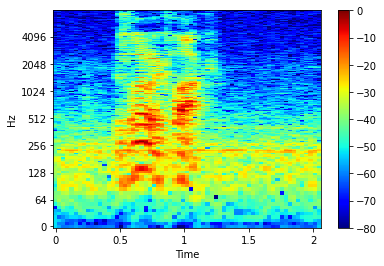

In [10]:
# Spectrogram of frequency - y_axis='log'
X_C1 = librosa.stft(sample_C1)
Xdb_C1 = librosa.amplitude_to_db(np.abs(X_C1), ref=np.max)
#plt.figure()
librosa.display.specshow(Xdb_C1, sr=sr_C1, x_axis='time', y_axis='log', cmap='jet')
plt.colorbar()

### >> 'log' exands the lower frequencies. As human speech is usually in the lower F, it is common to use log to show the pattern

### Importing and pre-processing of Data

CREATE SPECTOGRAM (Save to output folder)

For each audio.wav file:
* load audio (x, sr)
* Fourier transformation (X)
* Calculate amplitude (Xdb)

- set plot axis (ax)
- set axis off (remove from saved file)
- Create Spectogram

- Extract file name (name)
- Save image.png to output folder
- Close plot

In [ ]:
# create a list of file names (--> '1002_MTI_DIS_XX.wav')
files = os.listdir('../data/audio')

In [ ]:
for file in files:
    # load and transform audio file
    x, sr = librosa.load(f'data/audio/{file}', sr=16000)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(np.abs(X), ref=np.max)
    ax = plt.axes()
    ax.set_axis_off()
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log', cmap='jet')

    # save to output folder
    name = file.split('.')[0]
    plt.savefig(f'data/output/{name}.png', bbox_inches='tight', transparent=True, pad_inches=0.0)
    plt.close()


As Duration of Audio varries (2.5-3.5 Seconds), we want to check if these length are distributed similarly among the Labels
EXTRACT DURATION (create df with file name and emotion label)
* Extract emotion label (emotion)
* Extract duration of audio (duration)
* append info to list (rows)

In [12]:
# create a list of file names (--> '1002_MTI_DIS_XX.wav')
files2 = os.listdir('../data/audio')

In [13]:
len(files2)

7442

In [14]:
# create empty list to store extracted info (file name, emotion label, duration of audio)
rows = []

In [16]:
# extract info for "duration" data frame, and append to "rows" list
for file in files2:
    name = file.split('.')[0]
    emotion = name.split('_')[2]
    duration = librosa.get_duration(filename=f'../data/audio/{file}')
    rows.append([file, emotion, duration])

In [17]:
# turn list to data frame
df = pd.DataFrame(rows, columns=["file_name", "emotion", "duration"])
df

,file_name,emotion,duration
0,1001_DFA_ANG_XX.wav,ANG,2.275562
1,1001_DFA_DIS_XX.wav,DIS,2.335688
2,1001_DFA_FEA_XX.wav,FEA,2.168813
3,1001_DFA_HAP_XX.wav,HAP,1.868500
4,1001_DFA_NEU_XX.wav,NEU,2.035375
...,...,...,...
7437,1091_WSI_DIS_XX.wav,DIS,2.502500
7438,1091_WSI_FEA_XX.wav,FEA,2.502500
7439,1091_WSI_HAP_XX.wav,HAP,2.168813
7440,1091_WSI_NEU_XX.wav,NEU,2.335688


In [23]:
# save df
df.to_csv('duration.csv')

In [18]:
df['duration'].describe()

count    7442.000000
mean        2.542884
std         0.505979
min         1.267937
25%         2.202187
50%         2.502500
75%         2.836187
max         5.005000
Name: duration, dtype: float64

In [19]:
df.groupby('emotion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
emotion,,,,,,,,
ANG,1271.0,2.584391,0.490996,1.501500,2.268937,2.569250,2.869562,4.971625
DIS,1271.0,2.778297,0.580579,1.267937,2.369000,2.736063,3.103125,4.871562
FEA,1271.0,2.512276,0.462544,1.368000,2.185500,2.469125,2.769437,4.537875
HAP,1271.0,2.342003,0.433010,1.334688,2.035375,2.302313,2.602625,4.204187
NEU,1087.0,2.430809,0.421891,1.334688,2.135438,2.402375,2.669313,4.771438
SAD,1271.0,2.593301,0.506360,1.468125,2.268937,2.535875,2.869500,5.005000


array([[<AxesSubplot:title={'center':'ANG'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'FEA'}>,
        <AxesSubplot:title={'center':'HAP'}>],
       [<AxesSubplot:title={'center':'NEU'}>,
        <AxesSubplot:title={'center':'SAD'}>]], dtype=object)

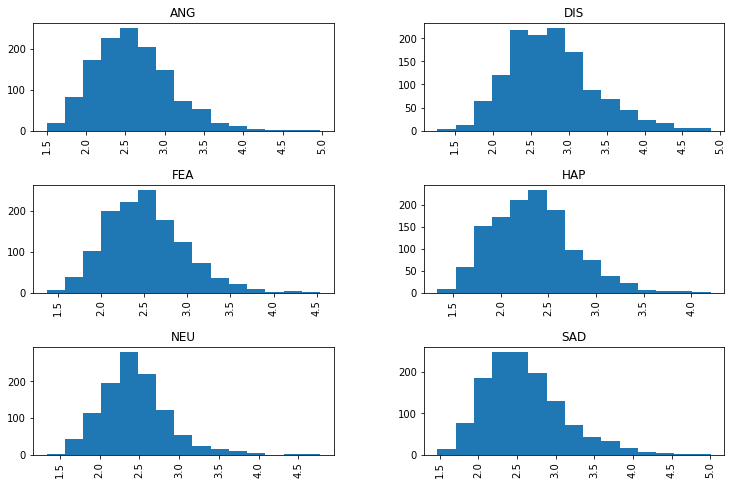

In [20]:
# plot distribution of audios by their length, per emotion label
df.hist(by='emotion', figsize=[12, 8], bins=15)

### Import Spectograms and build X, y data arrays

create loop and exectute for all dataset
* loop through png_files  (files3)
* import image as PIL.Image.Image
* convert image to np.array   (example - numpy.ndarray, (217, 334, 3)))

* extract file name = split('.')[0]    remove .png
* extract emotion label = split('_')[2]
* index of file in list (stays same when turned to array) len(list)
* create dictionarry entry- key: index, value:file_name

* X.append(image_array)
* y.append(label)

In [101]:
# list of file names
files3 = os.listdir('data/spectograms')

# empty lists to collect X-image arrays, y- corresponding labels
X = []
y = []

# empty dictionary (index:file_name)
dict = {}

# empty list to document images and arrays size + indexes
df_rows= []

In [102]:
for file in files3:
    image = load_img(f'data/spectograms/{file}')
    image_array = np.array(image)

    file_name = file.split('.')[0]
    emotion = file_name.split('_')[2]
    index = len(X)

    df_rows.append([index, file_name, image.size, image_array.shape])
    dict[index] = file_name

    X.append(image_array)
    y.append(emotion)

In [103]:
len(X), len(y)

(7442, 7442)

In [105]:
len(dict)

7442

In [107]:
# turn list to data frame
df_images = pd.DataFrame(df_rows, columns=['index', 'file_name', 'image_size', 'array_shape'])
df_images

,index,file_name,image_size,array_shape
0,0,1001_DFA_ANG_XX,"(334, 217)","(217, 334, 3)"
1,1,1001_DFA_DIS_XX,"(334, 217)","(217, 334, 3)"
2,2,1001_DFA_FEA_XX,"(334, 217)","(217, 334, 3)"
3,3,1001_DFA_HAP_XX,"(334, 217)","(217, 334, 3)"
4,4,1001_DFA_NEU_XX,"(334, 217)","(217, 334, 3)"
...,...,...,...,...
7437,7437,1091_WSI_DIS_XX,"(334, 217)","(217, 334, 3)"
7438,7438,1091_WSI_FEA_XX,"(334, 217)","(217, 334, 3)"
7439,7439,1091_WSI_HAP_XX,"(334, 217)","(217, 334, 3)"
7440,7440,1091_WSI_NEU_XX,"(334, 217)","(217, 334, 3)"


In [112]:
df_images['image_size'].nunique(), df_images['image_size'].unique()

(1, array([(334, 217)], dtype=object))

In [114]:
df_images['array_shape'].nunique(), df_images['array_shape'].unique()

(1, array([(217, 334, 3)], dtype=object))

In [115]:
# turn lists into arrays
X = np.array(X)
y = np.array(y)

In [116]:
X.shape, y.shape

((7442, 217, 334, 3), (7442,))